# ECS7024 Statistics for Artificial Intelligence and Data Science - Course work 3

This notebook aims to statistically analyse the average house prices in England using the chi squared test. It is done with the help of supporting libraries such as pandas, matplotlib, seaborn and scipy.stats. 

#### Part 1: Data Preparation
- Separating the regions and areas in the average property price dataset.
- Mapping the areas to the associated regions from the location codes dataset. 
- Data manipulation for missing values. 

#### Part 2: Trends in Detached and Flats
- Plotting a collective trendline for all regions -trends for detached and flats
- Plotting trends for each region. 

#### Part 3: Price Changes
- Computing price changes in July 2017 and July 2018 for flats.
- Analysing the increase and decrease in prices for all regions.
- Visualising the changes. 

#### Part 4: Statistical test
- Creating a cross tabulation for the rise and fall in flat prices for all regions
- Computing the chi squared test statistic 
- Analysing the null hypothesis

#### Conclusion

## Part 1: Data Preparation

In [1]:
#import the required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
%matplotlib inline

In [2]:
#import the dataset from csv file
prices = pd.read_csv('average-property-price.csv')
prices

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


In [3]:
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)

In [4]:
prices.isna().sum()/len(prices)

Area        0.000000
Code        0.000000
Detached    0.006250
Semi        0.006250
Terraced    0.003472
Flat        0.000000
Month       0.000000
dtype: float64

In [5]:
#import location codes from csv
location_codes = pd.read_csv('location-codes.csv')
location_codes

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


The average price dataset consists of regions as *Area* in the 'Area' feature. To prepare the given data according to our analysis, using a dictionary to map the 'authority code' to the 'region name' would be helpful. 

In [6]:
#mapping the authority code to region name
region_map = dict(zip(location_codes['AuthorityCode'],location_codes['RegionName']))
region_map

{'E06000001': 'North East',
 'E06000002': 'North East',
 'E06000003': 'North East',
 'E06000004': 'North East',
 'E06000005': 'North East',
 'E06000006': 'North West',
 'E06000007': 'North West',
 'E06000008': 'North West',
 'E06000009': 'North West',
 'E06000010': 'Yorkshire and The Humber',
 'E06000011': 'Yorkshire and The Humber',
 'E06000012': 'Yorkshire and The Humber',
 'E06000013': 'Yorkshire and The Humber',
 'E06000014': 'Yorkshire and The Humber',
 'E06000015': 'East Midlands',
 'E06000016': 'East Midlands',
 'E06000017': 'East Midlands',
 'E06000018': 'East Midlands',
 'E06000019': 'West Midlands',
 'E06000020': 'West Midlands',
 'E06000021': 'West Midlands',
 'E06000022': 'South West',
 'E06000023': 'South West',
 'E06000024': 'South West',
 'E06000025': 'South West',
 'E06000026': 'South West',
 'E06000027': 'South West',
 'E06000028': 'South West',
 'E06000029': 'South West',
 'E06000030': 'South West',
 'E06000031': 'East of England',
 'E06000032': 'East of England',
 'E

In [7]:
#assigning a column that maps the areas to the associated regions
prices = prices.assign(Region = prices['Code'].map(region_map))
prices

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East
...,...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01,NaN
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01,NaN
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01,NaN
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01,NaN


In [8]:
prices.Region.unique()

array(['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands', 'South West', 'East of England',
       'South East', 'London', nan], dtype=object)

The values appearing as NaN are so since the values in the 'Area' column are already of the same. Hence, separating the dataset into 2; regions and areas(with a column that denotes which region it belongs to) for further analysis.

In [9]:
#defining a function to subset the regions that are mentioned as areas in the prices dataset
def area(data):
    a=  data in ['North East', 'North West', 'Yorkshire and The Humber',
       'East Midlands', 'West Midlands Region', 'South West', 'East of England',
       'South East','London']
    return a

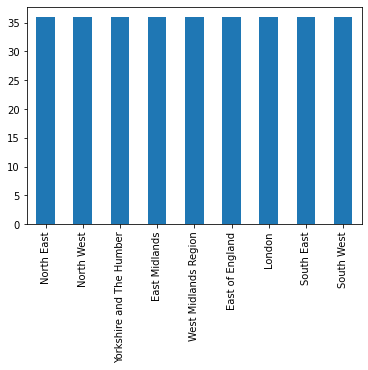

In [10]:
regions_as_areas = prices.loc[prices.Area.apply(area)==True]

regions_as_areas.Area.value_counts().plot(kind='bar')

regions_as_areas = regions_as_areas.drop(columns ='Region')

In [11]:
regions_as_areas

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


<AxesSubplot:>

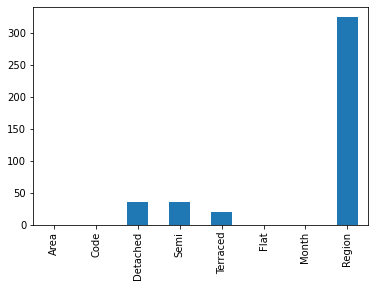

In [12]:
prices.isna().sum().plot(kind='bar')

<AxesSubplot:>

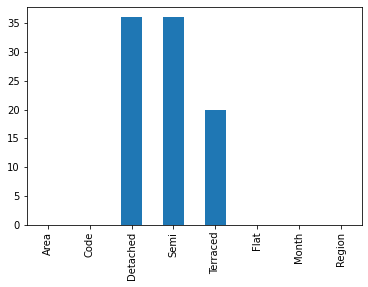

In [13]:
prices = prices.dropna(subset = 'Region')
prices.isna().sum().plot(kind = 'bar')

In [14]:
#to inspect the Null values in the prices dataset
prices.loc[prices['Detached'].isna()]

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,London


In [15]:
prices.loc[prices['Semi'].isna()]

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,London


In [16]:
prices.loc[prices['Terraced'].isna()]

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
3292,City of London,E09000001,NaN,NaN,NaN,799677.2254,2018-01-01,London
3293,City of London,E09000001,NaN,NaN,NaN,780669.1239,2018-02-01,London
3294,City of London,E09000001,NaN,NaN,NaN,738167.2469,2018-03-01,London
3295,City of London,E09000001,NaN,NaN,NaN,729692.0505,2018-04-01,London
3296,City of London,E09000001,NaN,NaN,NaN,793436.4292,2018-05-01,London
3297,City of London,E09000001,NaN,NaN,NaN,786369.6628,2018-06-01,London
3298,City of London,E09000001,NaN,NaN,NaN,806727.1693,2018-07-01,London
3299,City of London,E09000001,NaN,NaN,NaN,781319.3840,2018-08-01,London
3300,City of London,E09000001,NaN,NaN,NaN,798566.3705,2018-09-01,London
3301,City of London,E09000001,NaN,NaN,NaN,800482.3905,2018-10-01,London


In [17]:
prices.loc[prices.Area == 'City of London']

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,London


From the observation above, it is evident that all the missing fields in the prices dataset belong to the 'City of London' area. Although these values are missing, we cannot treat them as plain missing data. This could possibly be the case given the structural demographic of the 'City of London'. The housing properties in the city of London are more inclined towards properties like Flats and Terraced (although these are not many in number). Finding a property in the City of London that is detached is rather impossible. Thus, the data exhibits the reality; ergo, no presence of these properties. 

It would be supportive to convert the missing values to 0 to further the analysis and to also denote its absence in the dataset. 

<AxesSubplot:ylabel='Frequency'>

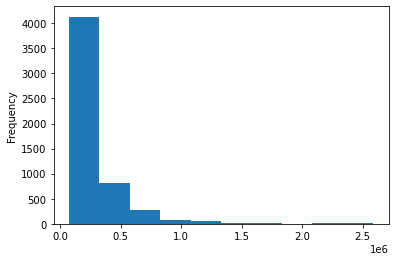

In [18]:
prices.Terraced.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

<Figure size 864x720 with 0 Axes>

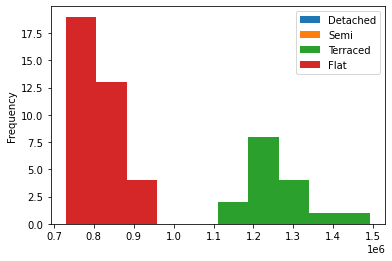

In [19]:
plt.figure(figsize = (12,10))
prices[prices['Area']=='City of London'].plot(kind  = 'hist')

This distribution is an evidence that City of London in the London region does not have any detached or semi house data (either implying that they do not exist or are not for sale) while it does have terraced. This distribution implies that we can fill the missing values with a summary statistic as it is vaguely visble that the distribution for terraced is negatively skewed. 

In [20]:
#plotting distribution to check the skew of the terraced houses in co_london
co_lon_ter = prices[prices['Area']=='City of London']['Terraced']

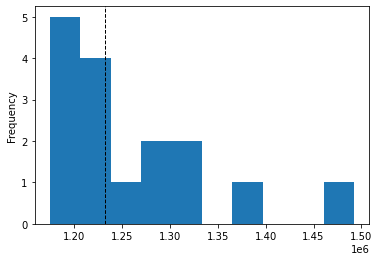

1232198.045


In [21]:
co_lon_ter.plot(kind='hist',bins = 10)
plt.axvline(co_lon_ter.median(), color='k', linestyle = 'dashed', linewidth= 1, label = 'median')
plt.show()
print(co_lon_ter.median())

In [22]:
prices = prices.copy()
prices['Terraced'] = prices['Terraced'].fillna(co_lon_ter.median())

In [23]:
prices = prices.fillna(0)

## Part 2: Trends

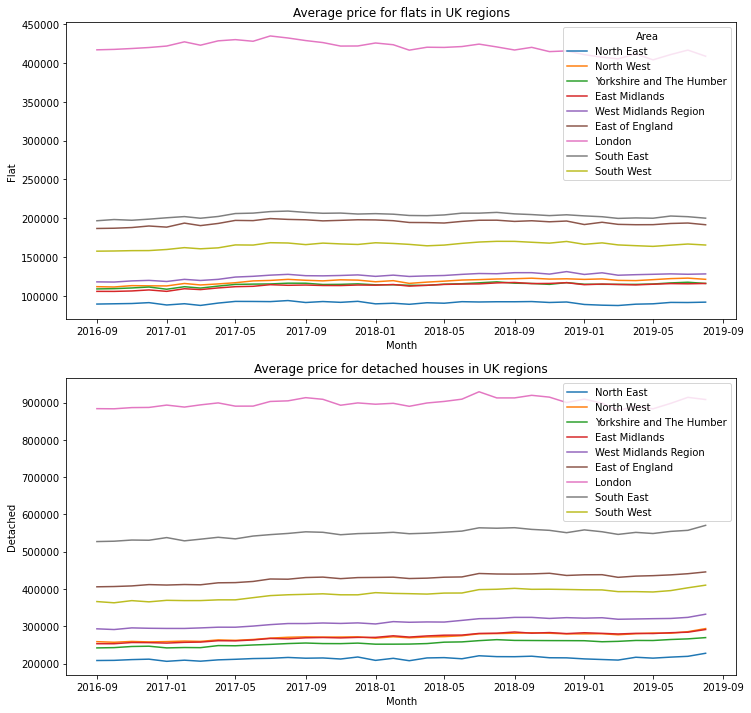

In [24]:
#to plot the trend in prices for Flats and Detached housing in all 9 regions
fig, (a1,a2) = plt.subplots(2, figsize = (12,12))
sns.lineplot(data= regions_as_areas, x='Month', y='Flat', hue='Area', ax = a1)
sns.lineplot(data = regions_as_areas, x = 'Month', y= 'Detached', hue = 'Area', ax = a2)
a1.set_title('Average price for flats in UK regions')
a2.set_title('Average price for detached houses in UK regions')


plt.legend(loc = 'upper right')
plt.show()

The lineplot above reveals the trend for flats and detached properties across the 9 regions (as the colours shown in the legend). An explicit evidence that can be seen is that the detached in London are expensive by an approximate range  45-77% and flats are expensive by an approximate range 45-70% in comparison to the other regions.

Something worth noting in this visual is that North West, Yorkshire and The Humber and East Midlands seem to have an overlap in prices. 

In [25]:
#setting timeseries as index to plot trends
date_index_regions = regions_as_areas.set_index('Month')

In [26]:
date_index_regions

,Area,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
2016-10-01,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
2016-11-01,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
2016-12-01,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
2017-01-01,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214
...,...,...,...,...,...,...
2019-04-01,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
2019-05-01,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
2019-06-01,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830


In [27]:
#to create a comparison between flats and detached 
flats_detached = date_index_regions.loc[:,('Area','Code','Detached','Flat')]
flats_detached.groupby('Area').sum()

,Detached,Flat
Area,,
East Midlands,9.780677e+06,4.066220e+06
East of England,1.542028e+07,6.992013e+06
London,3.238121e+07,1.511287e+07
North East,7.694066e+06,3.270404e+06
North West,9.796616e+06,4.274584e+06
South East,1.973553e+07,7.322189e+06
South West,1.390582e+07,5.951970e+06
West Midlands Region,1.117944e+07,4.518483e+06
Yorkshire and The Humber,9.172227e+06,4.113437e+06


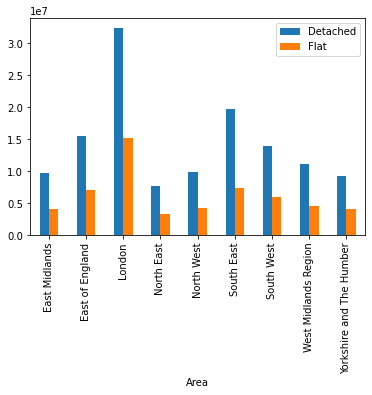

In [28]:
flats_detached.groupby('Area').sum().plot(kind='bar')
plt.xticks(rotation = 90)
plt.show()

The bar chart shows the differences in the property prices as a summation across all the regions and over a period of 36 months. It showcases the rise in detached properties while the prices for flats is about half in all regions. 

In [29]:
#to plot the trends for all 9 regions separate
eastengland = flats_detached.loc[flats_detached['Area']== 'East of England']
london = flats_detached.loc[flats_detached['Area']== 'London']
southwest = flats_detached.loc[flats_detached['Area']=='South West']
southeast = flats_detached.loc[flats_detached['Area']=='South East']
northeast = flats_detached.loc[flats_detached['Area']=='North East']
westmidlands = flats_detached.loc[flats_detached['Area']=='West Midlands Region']
yorkshire = flats_detached.loc[flats_detached['Area']=='Yorkshire and The Humber']
northwest = flats_detached.loc[flats_detached['Area']=='North West']
eastmidlands = flats_detached.loc[flats_detached['Area']=='East Midlands']

In [30]:
#defining a function to plot timeseries
def plot_time(axes, x,y,color,xlabel,ylabel):
    axes.plot(x,y,color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)

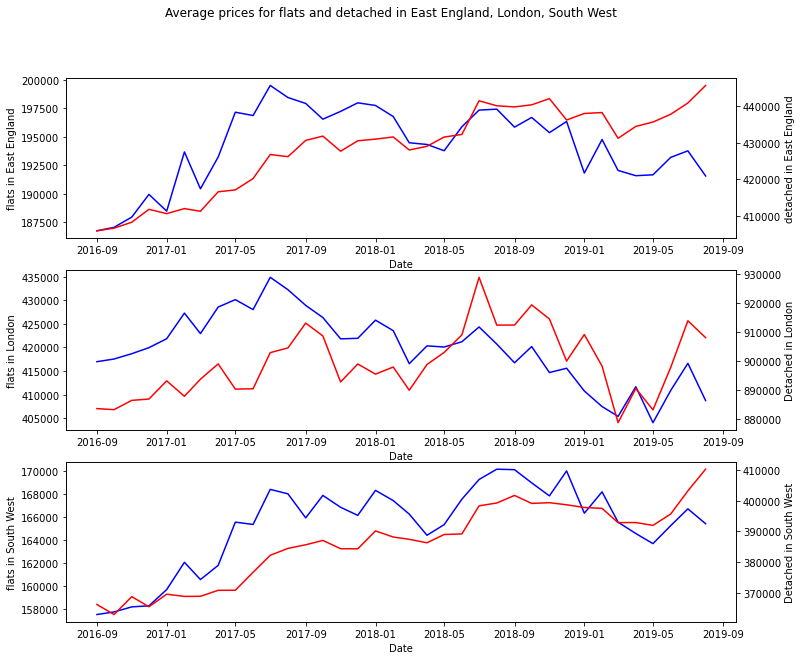

In [31]:
fig,(a1,a2,a3) = plt.subplots(3, figsize = (12,10))

plot_time(a1, eastengland.index,eastengland['Flat'],'blue',xlabel = 'Date',ylabel='flats in East England')
ax1= a1.twinx()
plot_time(ax1, eastengland.index, eastengland['Detached'],'red',xlabel = 'Date', ylabel='detached in East England')

plot_time(a2, london.index, london['Flat'], 'blue',xlabel = 'Date', ylabel='flats in London')
ax2 = a2.twinx()
plot_time(ax2, london.index, london['Detached'],'red',xlabel = 'Date', ylabel='Detached in London')

plot_time(a3, southwest.index, southwest['Flat'],'blue',xlabel = 'Date', ylabel='flats in South West')
ax3 = a3.twinx()
plot_time(ax3, southwest.index, southwest['Detached'],'red', xlabel = 'Date',ylabel='Detached in South West')

plt.suptitle('Average prices for flats and detached in East England, London, South West')
plt.show()

The trends for all the 9 regions may be vaguely similar, however they are not. The first 3 regions; East England, London, and South West have an explicit change in their trend. 
- East England - prices for flats have peaked in 2017 while it gradually reduced in toward the end of 2019 with a difference of 3% reduction. Whilst such trends took place for the former, detached properties had a gradual growth up to 440,000 with no reduction in prices. Although, the growth has been only by 6% in 36 months.

- London - prices for flats and detached properties have displayed a conflicting rise and fall from 2016 to 2019. Both the prices had a fall in 2017 while it picked up its rates in 2018. However, property rates in 2019 plunged to approx. 405,000£ for flats and 910,000£ for detached. The difference in rates for flats as approx. 7% and 2% for detached. 

- South West- In contrary to the former 2 regions, the South West has had a development with miniscule drops over the 36 months, ending with about 410,000£ for detached  and 165,000£. (approx. 9.7% and 4.2%)

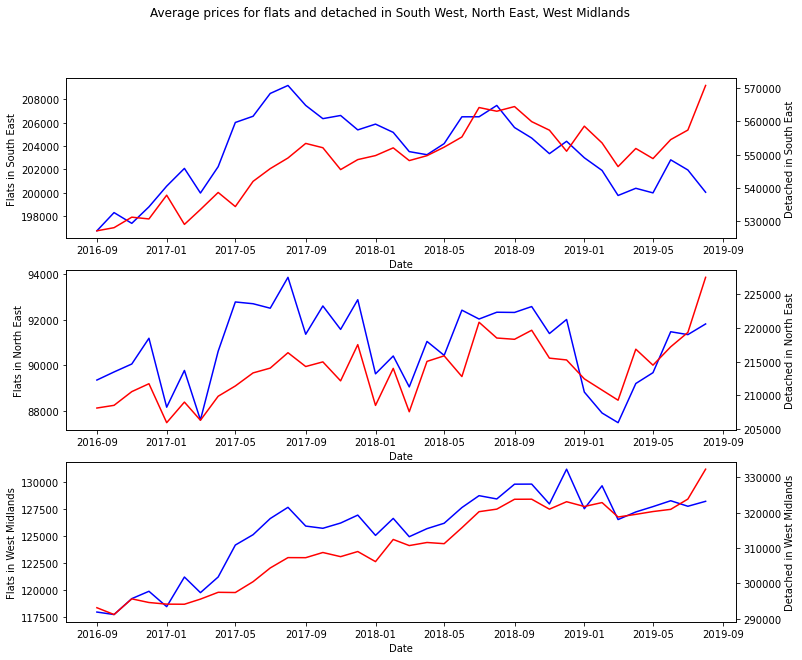

In [32]:
fig,(a4,a5,a6) = plt.subplots(3, figsize = (12,10))

plot_time(a4, southeast.index, southeast['Flat'],'blue',xlabel = 'Date', ylabel= 'Flats in South East')
ax4 = a4.twinx()
plot_time(ax4, southeast.index, southeast['Detached'],'red',xlabel = 'Date', ylabel= 'Detached in South East')

plot_time(a5, northeast.index, northeast['Flat'],'blue', xlabel = 'Date',ylabel= 'Flats in North East')
ax5 = a5.twinx()
plot_time(ax5, northeast.index, northeast['Detached'],'red',xlabel = 'Date', ylabel= 'Detached in North East')

plot_time(a6, westmidlands.index, westmidlands['Flat'],'blue',xlabel = 'Date', ylabel= 'Flats in West Midlands')
ax6 = a6.twinx()
plot_time(ax6, westmidlands.index, westmidlands['Detached'],'red',xlabel = 'Date', ylabel= 'Detached in West Midlands')

plt.suptitle('Average prices for flats and detached in South West, North East, West Midlands')
plt.show()

- South East - the South East has peaked the highest for flat prices in 2017; between May and September with its curtailment in 2019. Whilst that was the case for flats, detached properties have shown popularity in pricing by reaching its highest peak in 2019 Autumn at a massive price of 570,000£. 
- North East - Similar to London, the North East has had a conflicting rise and fall in its prices displaying no possible trend, ending the 2019 quarter with a high price of approx. 92,000£ for flats and 225,000£ for detached prices. 
- West Midlands - The West Midlands has shown a substantial growth over the years for both the property types with a value of approx.130,000£ for flats and 330,000£ for detached. 

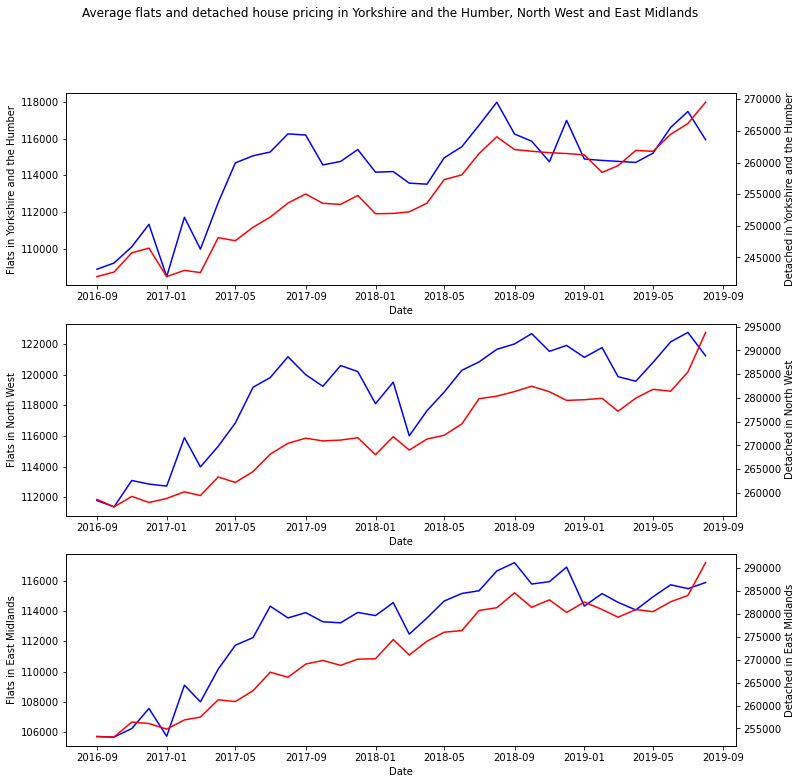

In [33]:
fig, (a7,a8,a9) = plt.subplots(3, figsize =(12,12))

plot_time(a7, yorkshire.index, yorkshire['Flat'],'blue',xlabel = 'Date', ylabel= 'Flats in Yorkshire and the Humber')
ax7 = a7.twinx()
plot_time(ax7, yorkshire.index, yorkshire['Detached'],'red',xlabel = 'Date', ylabel= 'Detached in Yorkshire and the Humber')
      
              
plot_time(a8, northwest.index, northwest['Flat'],'blue',xlabel = 'Date', ylabel= 'Flats in North West')
ax8 = a8.twinx()
plot_time(ax8, northwest.index, northwest['Detached'],'red',xlabel = 'Date', ylabel= 'Detached in North West')
             

plot_time(a9, eastmidlands.index, eastmidlands['Flat'],'blue',xlabel = 'Date', ylabel= 'Flats in East Midlands')
ax9 = a9.twinx()
plot_time(ax9, eastmidlands.index, eastmidlands['Detached'],'red',xlabel = 'Date', ylabel= 'Detached in East Midlands')



plt.suptitle('Average flats and detached house pricing in Yorkshire and the Humber, North West and East Midlands')
plt.show()

These 3 regions have displayed a rather overlapping trend of growth. The prices for the regions range between 106,000£ to 118,000£ for flats and from 255,000£ to 270,000£ for detached properties. 

The evidence for overlap is due to the fact that properties' average values have increased by only 8% for flats and approx.12% for detached properties in all the 3 regions. Hence, proving the reason for overlap in trend. 

## Part 3: Price Changes

In [34]:
#to create display the increase and decrease in prices
date_index_areas = prices.set_index('Month')

In [35]:
#flat prices in all regions for the month july 2017
flat_july_2017 = date_index_areas.loc["2017-07-01", ('Area','Flat','Region')]

In [36]:
flat_july_2017 = flat_july_2017.reset_index()
flat_july_2017

,Month,Area,Flat,Region
0,2017-07-01,Hartlepool,65007.84170,North East
1,2017-07-01,Middlesbrough,69163.06963,North East
2,2017-07-01,Redcar and Cleveland,65507.80990,North East
3,2017-07-01,Stockton-on-Tees,83599.32806,North East
4,2017-07-01,Darlington,87041.37973,North East
...,...,...,...,...
146,2017-07-01,Suffolk,140278.18370,East of England
147,2017-07-01,Surrey,270116.52610,South East
148,2017-07-01,Warwickshire,165676.94800,West Midlands
149,2017-07-01,West Sussex,193547.45490,South East


In [37]:
#flat prices in all regions for the month of july in 2018
flat_july_2018 = date_index_areas.loc["2018-07-01", ('Area','Flat','Region')]
flat_july_2018 = flat_july_2018.reset_index()
flat_july_2018

,Month,Area,Flat,Region
0,2018-07-01,Hartlepool,61116.82158,North East
1,2018-07-01,Middlesbrough,69313.90788,North East
2,2018-07-01,Redcar and Cleveland,64802.79724,North East
3,2018-07-01,Stockton-on-Tees,83654.55272,North East
4,2018-07-01,Darlington,83679.31818,North East
...,...,...,...,...
146,2018-07-01,Suffolk,142488.46480,East of England
147,2018-07-01,Surrey,267144.69100,South East
148,2018-07-01,Warwickshire,167470.71860,West Midlands
149,2018-07-01,West Sussex,191835.79530,South East


In [38]:
area_price_dif = pd.DataFrame(flat_july_2017[['Area','Region','Flat']])
area_price_dif['Flat2018'] = flat_july_2018['Flat']
area_price_dif

,Area,Region,Flat,Flat2018
0,Hartlepool,North East,65007.84170,61116.82158
1,Middlesbrough,North East,69163.06963,69313.90788
2,Redcar and Cleveland,North East,65507.80990,64802.79724
3,Stockton-on-Tees,North East,83599.32806,83654.55272
4,Darlington,North East,87041.37973,83679.31818
...,...,...,...,...
146,Suffolk,East of England,140278.18370,142488.46480
147,Surrey,South East,270116.52610,267144.69100
148,Warwickshire,West Midlands,165676.94800,167470.71860
149,West Sussex,South East,193547.45490,191835.79530


In [39]:
area_price_dif = area_price_dif.rename(columns = {'Flat':'Flat2017'})
area_price_dif

,Area,Region,Flat2017,Flat2018
0,Hartlepool,North East,65007.84170,61116.82158
1,Middlesbrough,North East,69163.06963,69313.90788
2,Redcar and Cleveland,North East,65507.80990,64802.79724
3,Stockton-on-Tees,North East,83599.32806,83654.55272
4,Darlington,North East,87041.37973,83679.31818
...,...,...,...,...
146,Suffolk,East of England,140278.18370,142488.46480
147,Surrey,South East,270116.52610,267144.69100
148,Warwickshire,West Midlands,165676.94800,167470.71860
149,West Sussex,South East,193547.45490,191835.79530


In [40]:
#a column to show the difference in prices
area_price_dif['Difference'] = area_price_dif['Flat2017'] - area_price_dif['Flat2018']
area_price_dif

,Area,Region,Flat2017,Flat2018,Difference
0,Hartlepool,North East,65007.84170,61116.82158,3891.02012
1,Middlesbrough,North East,69163.06963,69313.90788,-150.83825
2,Redcar and Cleveland,North East,65507.80990,64802.79724,705.01266
3,Stockton-on-Tees,North East,83599.32806,83654.55272,-55.22466
4,Darlington,North East,87041.37973,83679.31818,3362.06155
...,...,...,...,...,...
146,Suffolk,East of England,140278.18370,142488.46480,-2210.28110
147,Surrey,South East,270116.52610,267144.69100,2971.83510
148,Warwickshire,West Midlands,165676.94800,167470.71860,-1793.77060
149,West Sussex,South East,193547.45490,191835.79530,1711.65960


In [41]:
#function definition for the change in flat prices
def price_diff(row):
    if row.Flat2017 < row.Flat2018:
        return 'Increase'
    else:
        return 'Decrease'
    

In [42]:

area_price_dif = area_price_dif.assign(Change = area_price_dif.apply(price_diff, axis=1))
area_price_dif

,Area,Region,Flat2017,Flat2018,Difference,Change
0,Hartlepool,North East,65007.84170,61116.82158,3891.02012,Decrease
1,Middlesbrough,North East,69163.06963,69313.90788,-150.83825,Increase
2,Redcar and Cleveland,North East,65507.80990,64802.79724,705.01266,Decrease
3,Stockton-on-Tees,North East,83599.32806,83654.55272,-55.22466,Increase
4,Darlington,North East,87041.37973,83679.31818,3362.06155,Decrease
...,...,...,...,...,...,...
146,Suffolk,East of England,140278.18370,142488.46480,-2210.28110,Increase
147,Surrey,South East,270116.52610,267144.69100,2971.83510,Decrease
148,Warwickshire,West Midlands,165676.94800,167470.71860,-1793.77060,Increase
149,West Sussex,South East,193547.45490,191835.79530,1711.65960,Decrease


In [43]:
#pivoting table to visualise increase and decrease
p1 = area_price_dif.pivot_table(values= ['Area'], index=['Region'],columns = ['Change'],aggfunc = 'count')
p1.fillna(0,inplace=True)

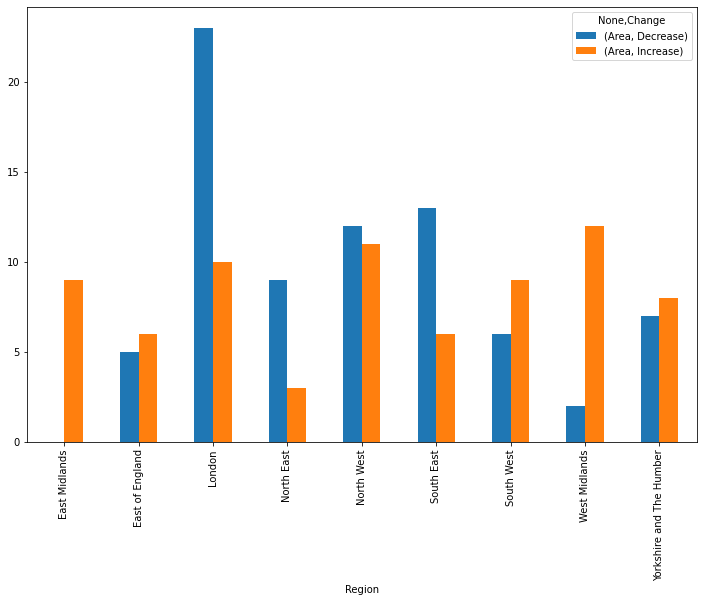

In [44]:
p1.plot(kind='bar',figsize =(12,8))
plt.show()

As we have inferred from our trendlines that London has the highest property rates in the country; it is interesting to see that it also remains as one of the regions with highest count in decrease for flat rates with over 50% in number. Alongside London with higher number of decrease in average flat prices, North East, North West and South East also have a higher count for decrease in the property prices in 2018 (although, apparently not as high as London). 

Whilst this has been the cast with 4 regions, the 5 other regions have only had a rise in count for their increase in property rates. With East Midlands having had only increase and no decrease, West Midlands does seem to have a rather small number of decrease in the prices. 

## Part 4: Statistical test

In [45]:
#to check if change in prices has effected all regions. 
crosstab = area_price_dif[['Area','Region','Change']]
crosstab

,Area,Region,Change
0,Hartlepool,North East,Decrease
1,Middlesbrough,North East,Increase
2,Redcar and Cleveland,North East,Decrease
3,Stockton-on-Tees,North East,Increase
4,Darlington,North East,Decrease
...,...,...,...
146,Suffolk,East of England,Increase
147,Surrey,South East,Decrease
148,Warwickshire,West Midlands,Increase
149,West Sussex,South East,Decrease


In [46]:
df=pd.crosstab(crosstab['Region'],crosstab['Change']).T
df

Region,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


The null hypothesis is that the increase and decrease in price changes for flats are uniformly distributed across the regions and are independent. 

In [47]:
#testing the null hypothesis using chi square test
test_stat, p_value, dof, expected = stats.chi2_contingency(df, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))


There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.056 %


A chi square test is a bivariate test statistic that tells us if the occurances are independent or related to each other; here, to test the independence of increase and decrease in prices for flats. Since the test statistic is above the critical  value (critical value = 15.507) for a degree of freedom of 8, the null hypothesis is rejected. We have sufficient evidence to prove that the positive and negative change in prices for flats are not similarly distributed across regions. However, we cannot be entirely sure about the causality of those occurrances (increase and decrease in prices). 

### Conclusion

From the collective analysis above for the property rates in England, the prices for the detached and flats have seen a rise and fall of just about 8-12%. Given the statistics of the increase and decrease in property prices, it is common for a region to be exposed to a 10% rise and just about 5 or 6% drop. 
We can see that regions such as London, North East, North West and South East were almost ideal to buy a flat in 2018 whilst the other 5 regions were not. Furthermore, buying a flat in the other regions for such prices could have been feasible if the population were planning to invest in a long term, since the value for such property in those regions is worth such in 2018. 